In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class PerceptronClassifier():
    """Perceptron classifier.
    
    Parameters
    -------------------
    
    eta : float, learning rate (between 0.0-0.1)
    n_iter : int, Passes over the training dataset.
    random_state : int, Random number generator seed for random weight initialization.
    
    Attributes
    w_ : 1d-array, Weights after fitting.
    errors_ : list, number of misclassification (updates) in each epoch.
    
    """
    
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """Fit training data.
        
        Parameters
        -----------
        X : array-like, shape = [n_samples, n_features], Training features 
        y : array-like, shpae = [n_samples], Target values.
        
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = X.shape[1]+1)
        
        self.errors_ = []
        
        for i in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        
        return self
    
    def net_input(self, X):
        """Calculate net input."""
        
        return np.dot(self.w_[1:], X) + self.w_[0]
    
    def predict(self, X):
        """Return class label after unit step."""
        
        return np.where(self.net_input(X) >= 0.0, 1, -1)

# Data

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)

In [4]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
y = df.iloc[:100,4].values
y = np.where(y == 'Iris-setosa', 1, -1)

X = df.iloc[:100, [0,2]].values

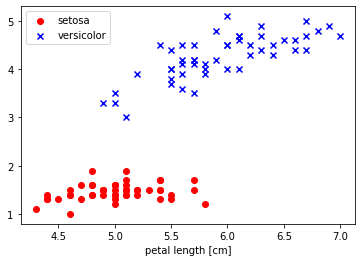

In [6]:
plt.scatter(X[:50,0], X[:50,1], color = 'red', marker = 'o', label = 'setosa')
plt.scatter(X[50:,0], X[50:,1], color = 'blue', marker = 'x', label = 'versicolor')

plt.xlabel('sepal length [cm]')
plt.xlabel('petal length [cm]')
plt.legend(loc = 'upper left')
plt.show()

# Model

In [7]:
cls = PerceptronClassifier(eta = 0.1, n_iter = 10)

In [8]:
cls.fit(X,y)

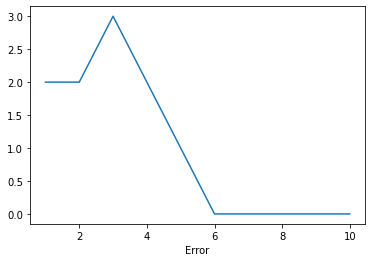

In [9]:
plt.plot(range(1, len(cls.errors_)+1), cls.errors_)
plt.xlabel('Epoch')
plt.xlabel('Error')
plt.show()

# Sklearn model

In [10]:
from sklearn.linear_model import Perceptron

In [19]:
ppn = Perceptron(eta0=0.1, max_iter = 10, random_state = 1)

In [21]:
ppn.fit(X, y)

Perceptron(eta0=0.1, max_iter=10, random_state=1)

In [ ]:
ppn